# CS375 - Assignment 1
#### Group 6 

## Part 1: ImageNet training and testing

In [2]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

### Getting data from the database
Let's connect to the database and pull the data training and test data that is stored while training our network.
In order to find the right experiment id, it is useful to display which experiments are stored in the database first.

In [7]:
collname = 'v1'
v_list = ['V0V3V6', 'V6']
target_layers = ['conv1', 'pool1']
step_list = [1]

In [8]:
coll = p_get_coll(collname)
coll.distinct('exp_id')

[u'experiment_1', u'experiment_1_1_v1_V0V3V6', u'experiment_1_1_v1_V6']

## Neural analysis


In the following, your task will be to plot your evaluations at different iteration steps. Therefore, index the data list with the appropriate indices, plot the results and mark all of the following plots with the iteration step.

In [10]:
data = {}
for iv in v_list:
    for istep in step_list:
        data[(iv, istep)] = p_get_data_list(coll, collname, istep, iv)

1 V0V3V6
1 V6


In [12]:
data[('V0V3V6', 1)].keys()

[u'spearman_corrcoef_pool1',
 u'within_categorization_fc2',
 u'within_categorization_fc4',
 u'continuous_conv1',
 u'categorization_pool1',
 u'it_regression_pool1',
 u'categorization_conv1',
 u'it_regression_conv1',
 u'continuous_pool1',
 u'rdm_fc2',
 u'rdm_fc4',
 u'spearman_corrcoef_conv1',
 u'rdm_pool1',
 u'conv1_kernel',
 u'it_regression_fc2',
 u'rdm_it',
 u'categorization_fc4',
 u'it_regression_fc4',
 u'continuous_fc2',
 u'continuous_fc4',
 u'categorization_fc2',
 u'spearman_corrcoef_fc2',
 u'within_categorization_pool1',
 u'rdm_conv1',
 u'spearman_corrcoef_fc4',
 u'within_categorization_conv1']

### Analyzing the RDM results

We will start with visualizing the RDMs you computed for each layer and the IT neurons. 

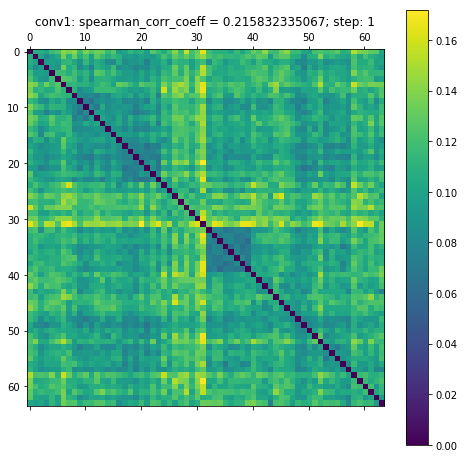

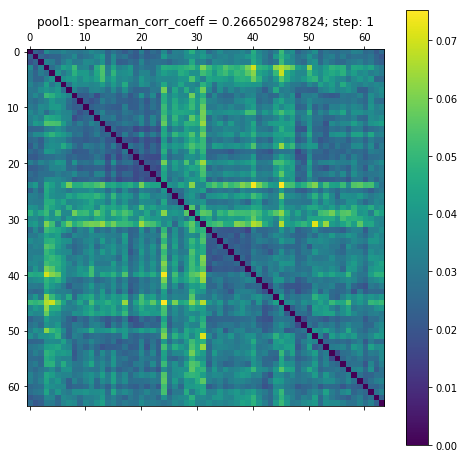

In [13]:
for istep in step_list:
    plot_rdms(data[('V6',istep)], target_layers, istep)

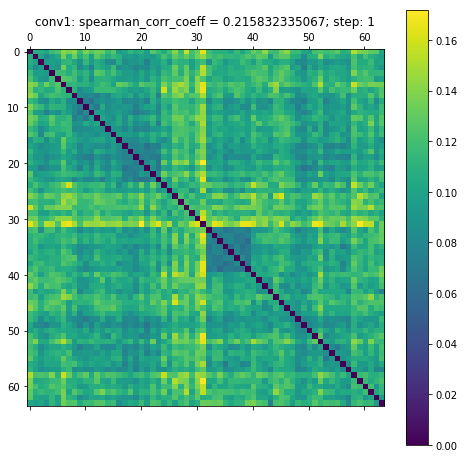

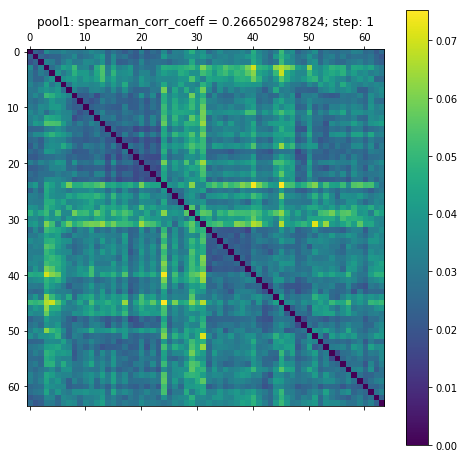

In [14]:
for istep in step_list:
    plot_rdms(data[('V0V3V6',istep)], target_layers, istep)

### Analyzing the categorization results

Now let's visualize the results of the categorization and within categorization test we performed for each layer.

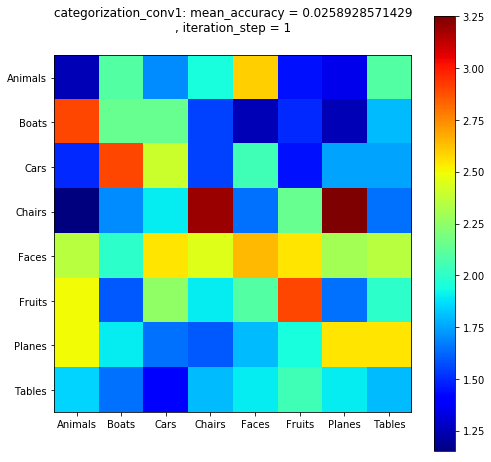

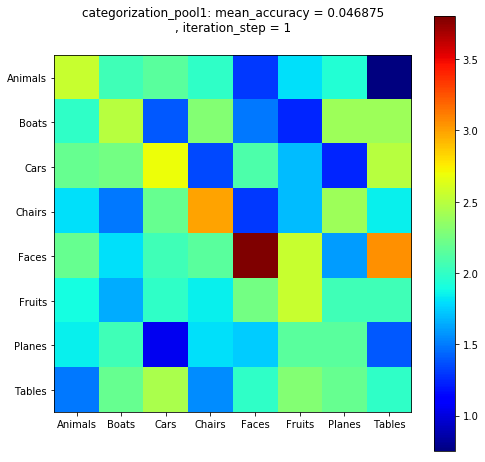

In [15]:
for istep in step_list:
    plot_categorization_results(data[('V6',istep)], target_layers, istep)

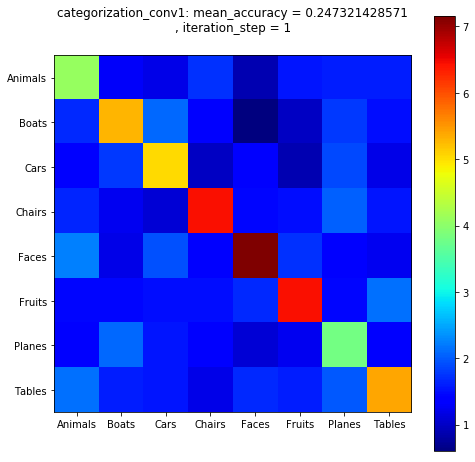

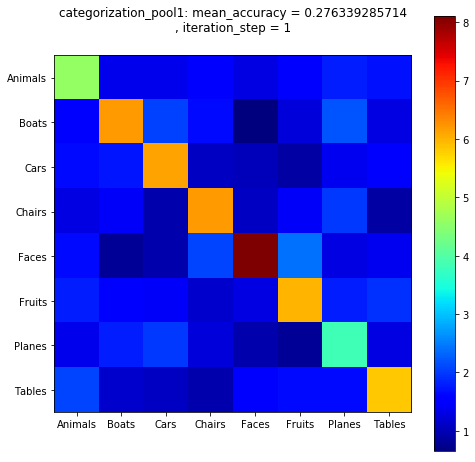

In [16]:
for istep in step_list:
    plot_categorization_results(data[('V0V3V6',istep)], target_layers, istep)

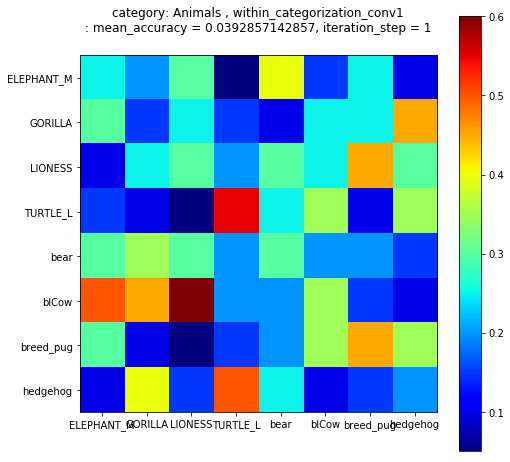

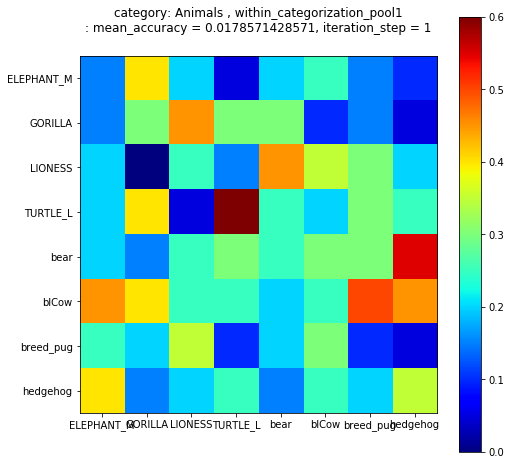

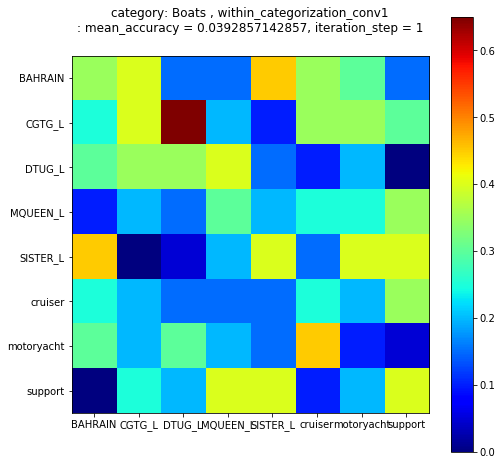

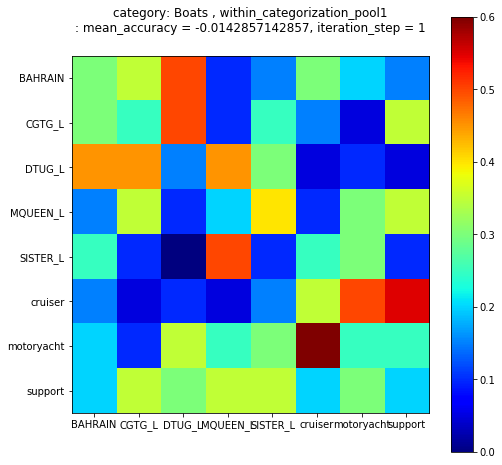

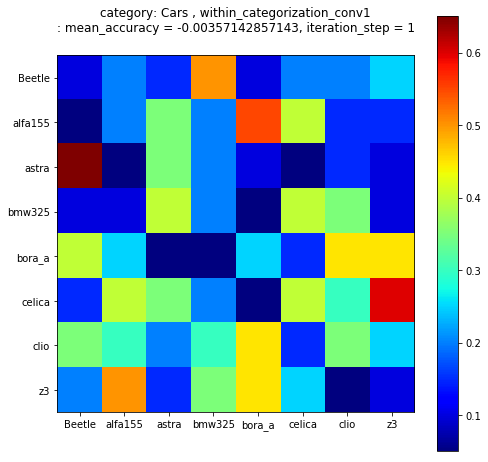

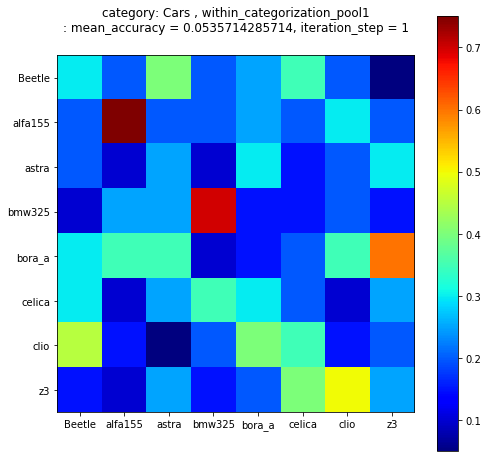

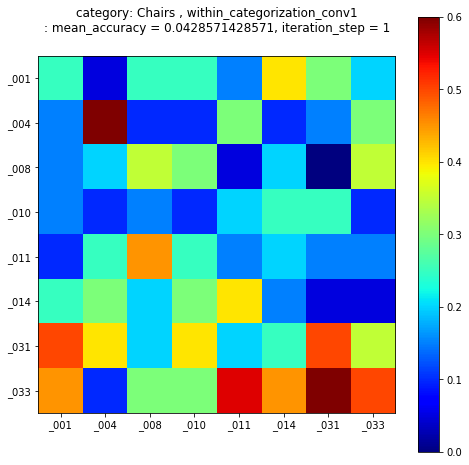

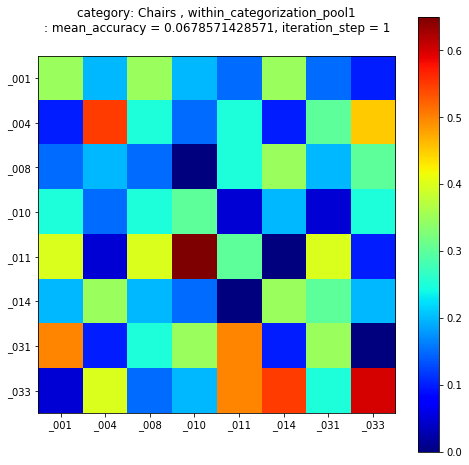

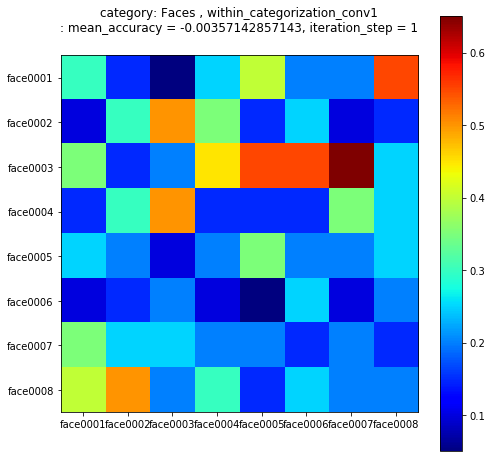

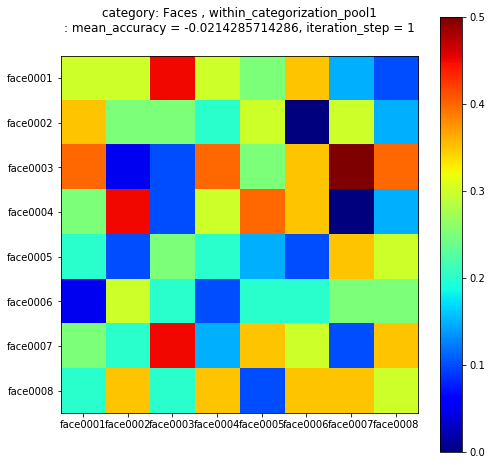

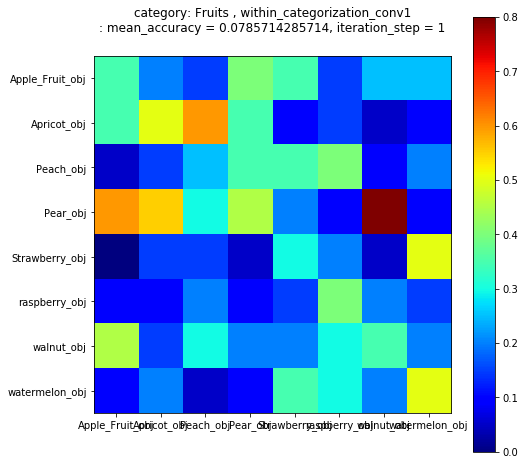

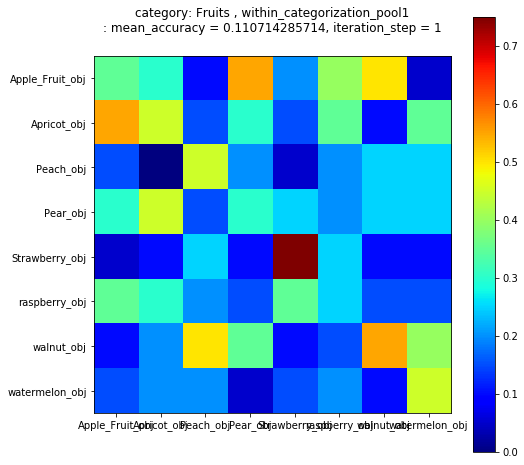

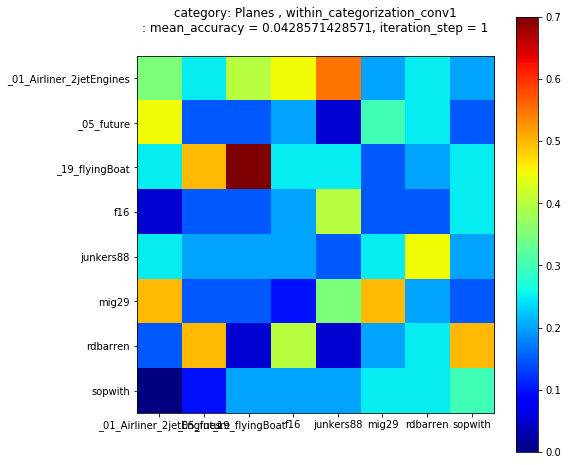

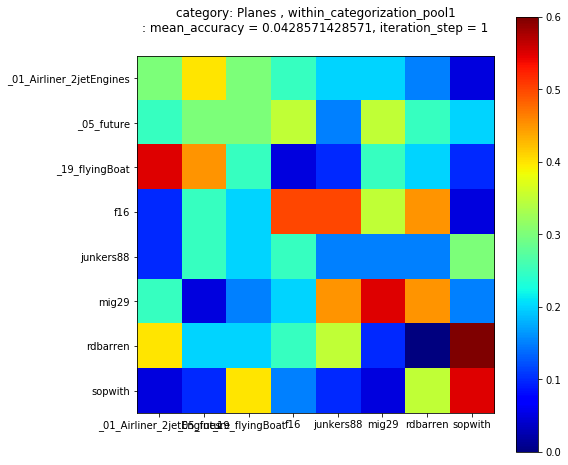

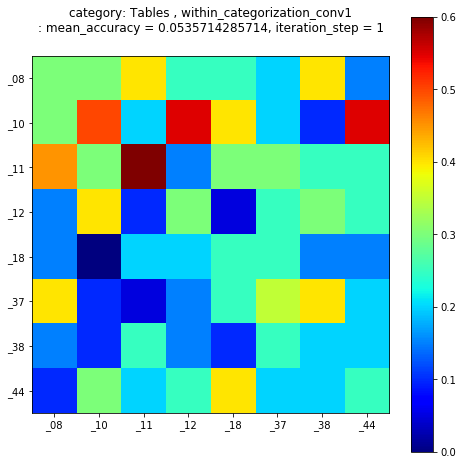

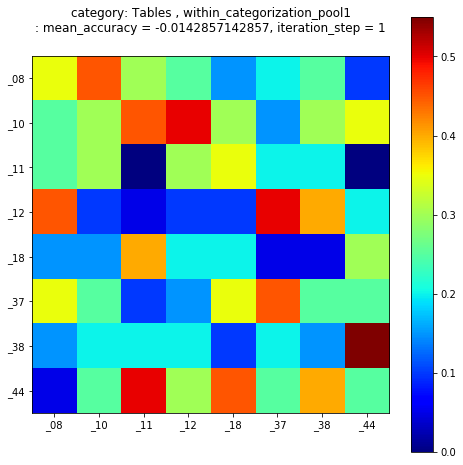

In [17]:
categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
for category in categories:
    for istep in step_list:
        plot_categorization_results(data[('V6',istep)], target_layers, istep, category=category)

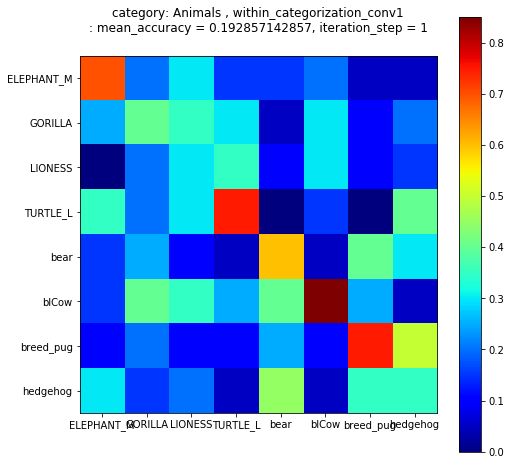

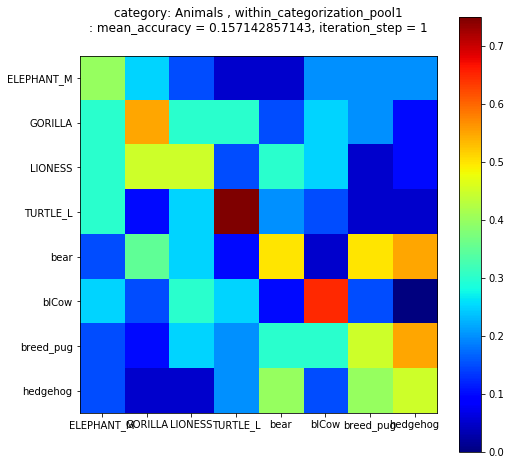

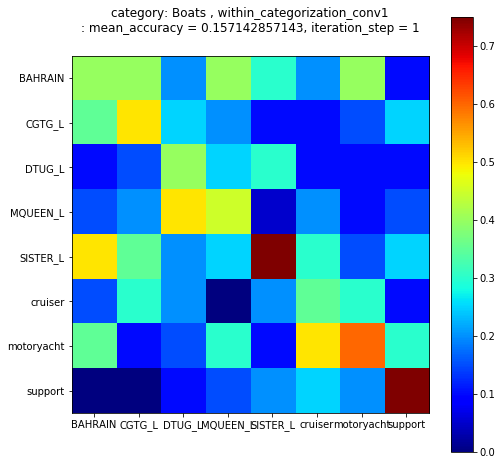

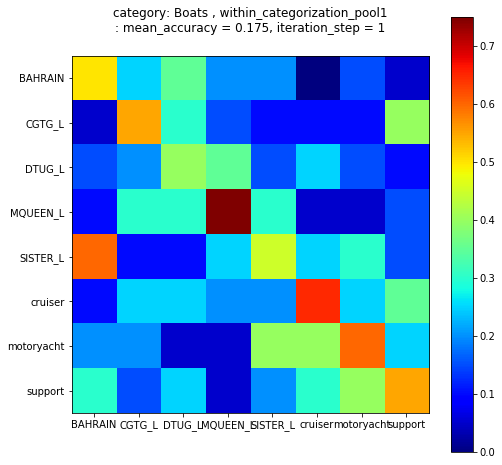

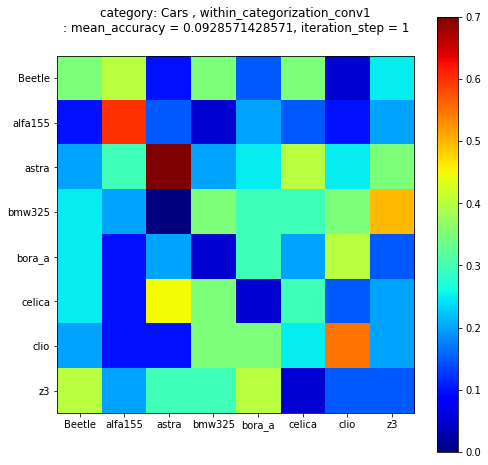

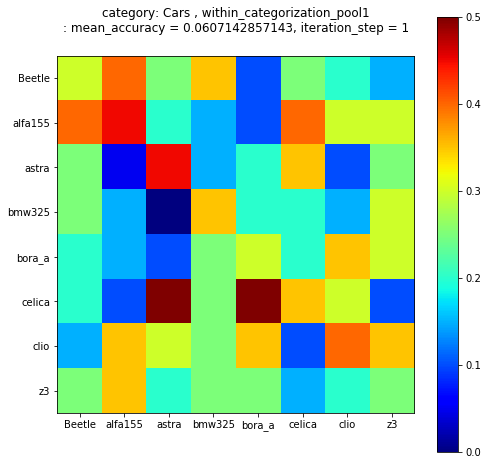

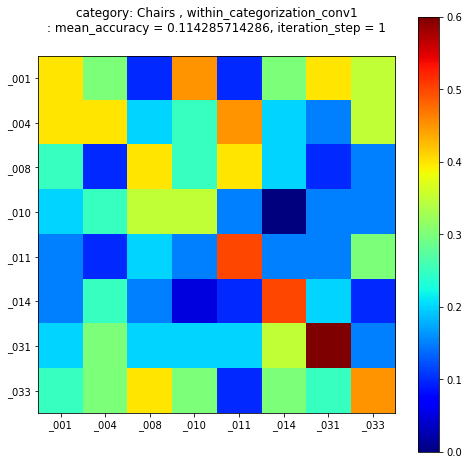

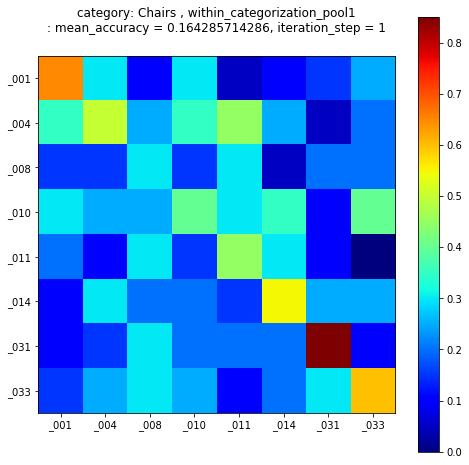

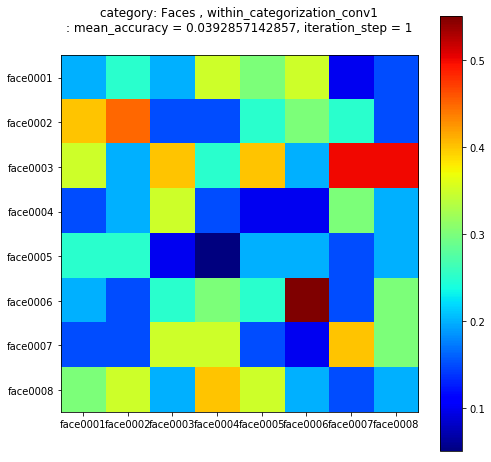

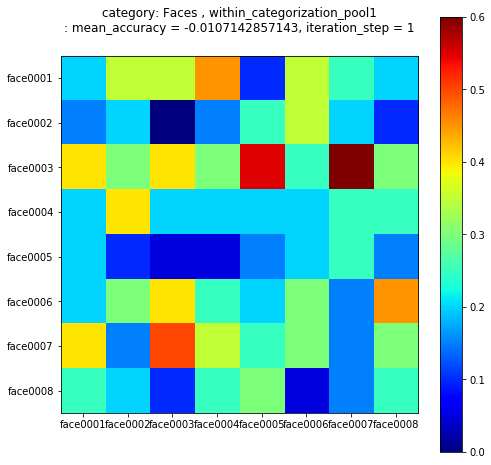

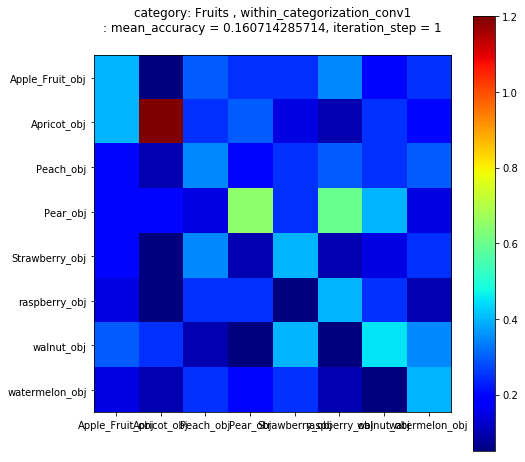

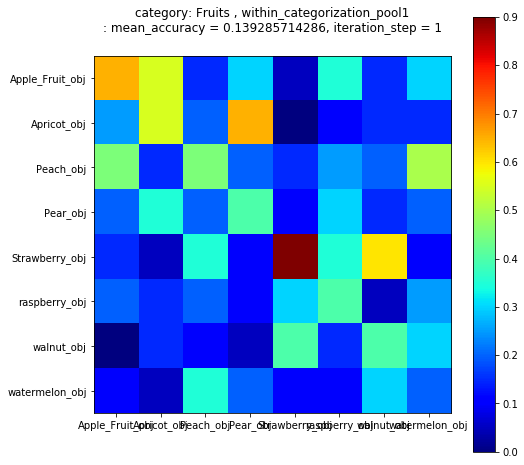

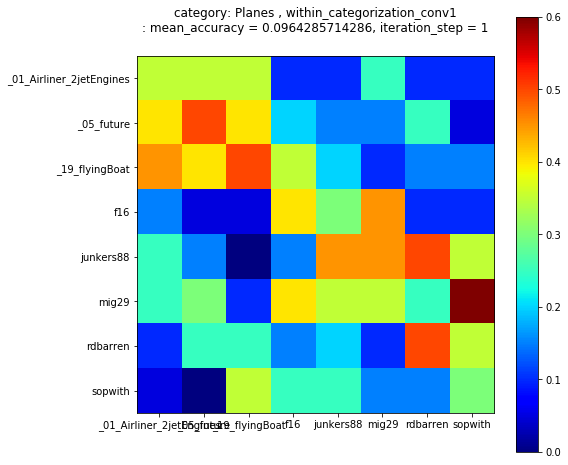

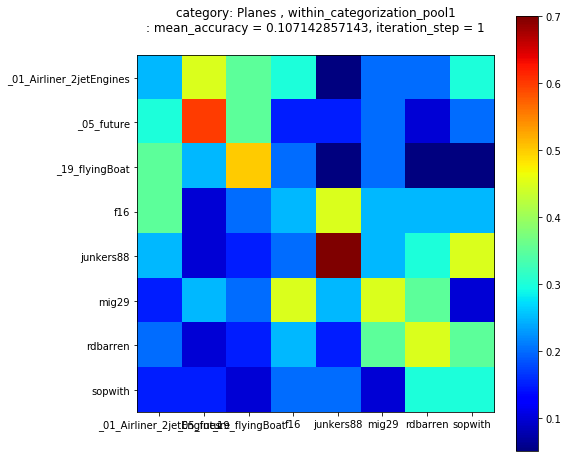

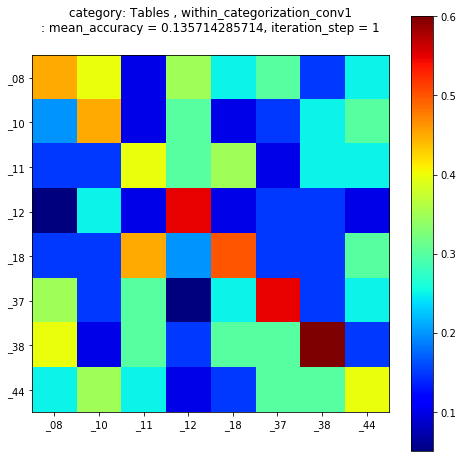

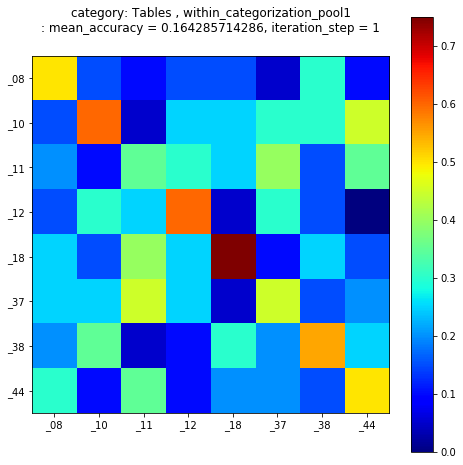

In [18]:
categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
for category in categories:
    for istep in step_list:
        plot_categorization_results(data[('V0V3V6',istep)], target_layers, istep, category=category)

### Continuous estimation results
We regress our activations against the 'ty' continuous variable. 

In [35]:
print("Continuous Estimation Task for ty \n")
for istep in step_list:
    for layer in target_layers:
        print('step: '+str(istep) + ', ' + layer + ":")
        print(data[('V6',istep)]['continuous_' + layer]['rsquared_loss'])
        print("")

Continuous Estimation Task for ty 

step: 1, conv1:
1.25015933084

step: 1, pool1:
1.0739573416



In [36]:
print("Continuous Estimation Task for ty \n")
for istep in step_list:
    for layer in target_layers:
        print('step: '+str(istep) + ', ' + layer + ":")
        print(data[('V0V3V6',istep)]['continuous_' + layer]['rsquared_loss'])
        print("")

Continuous Estimation Task for ty 

step: 1, conv1:
0.980514467545

step: 1, pool1:
0.775164412802



### Analyzing the regression results

We will now display the results of the regression test. 

Please print (1 - data['it\_regression_"insert_target_layer_here"']['noise_corrected_multi_rsquared_loss']) for each layer and step and label the print out with the layer name and step. Describe what you observe.    


In [22]:
for istep in step_list:
    plot_regression_results(data[('V6',istep)], target_layers, istep)

Oh no...it_regression_conv1 did not regress
Oh no...it_regression_pool1 did not regress


In [23]:
for istep in step_list:
    plot_regression_results(data[('V0V3V6',istep)], target_layers, istep)

step: 1, layer: conv1, calculated_value: -0.169774414515
step: 1, layer: pool1, calculated_value: -0.11360793144


### Visualizing the conv1 kernels
Lastly, we will plot the conv1 filter kernels. 

Your task is to visualize the 'conv1_kernel' in a 12 x 8 grid. Therefore, you just have to plot each kernel as an image in a subplot. The kernels are stored in data['conv1_kernel']. Print out the iteration step and plot the kernels and describe what you see. 

Iteration step: 1


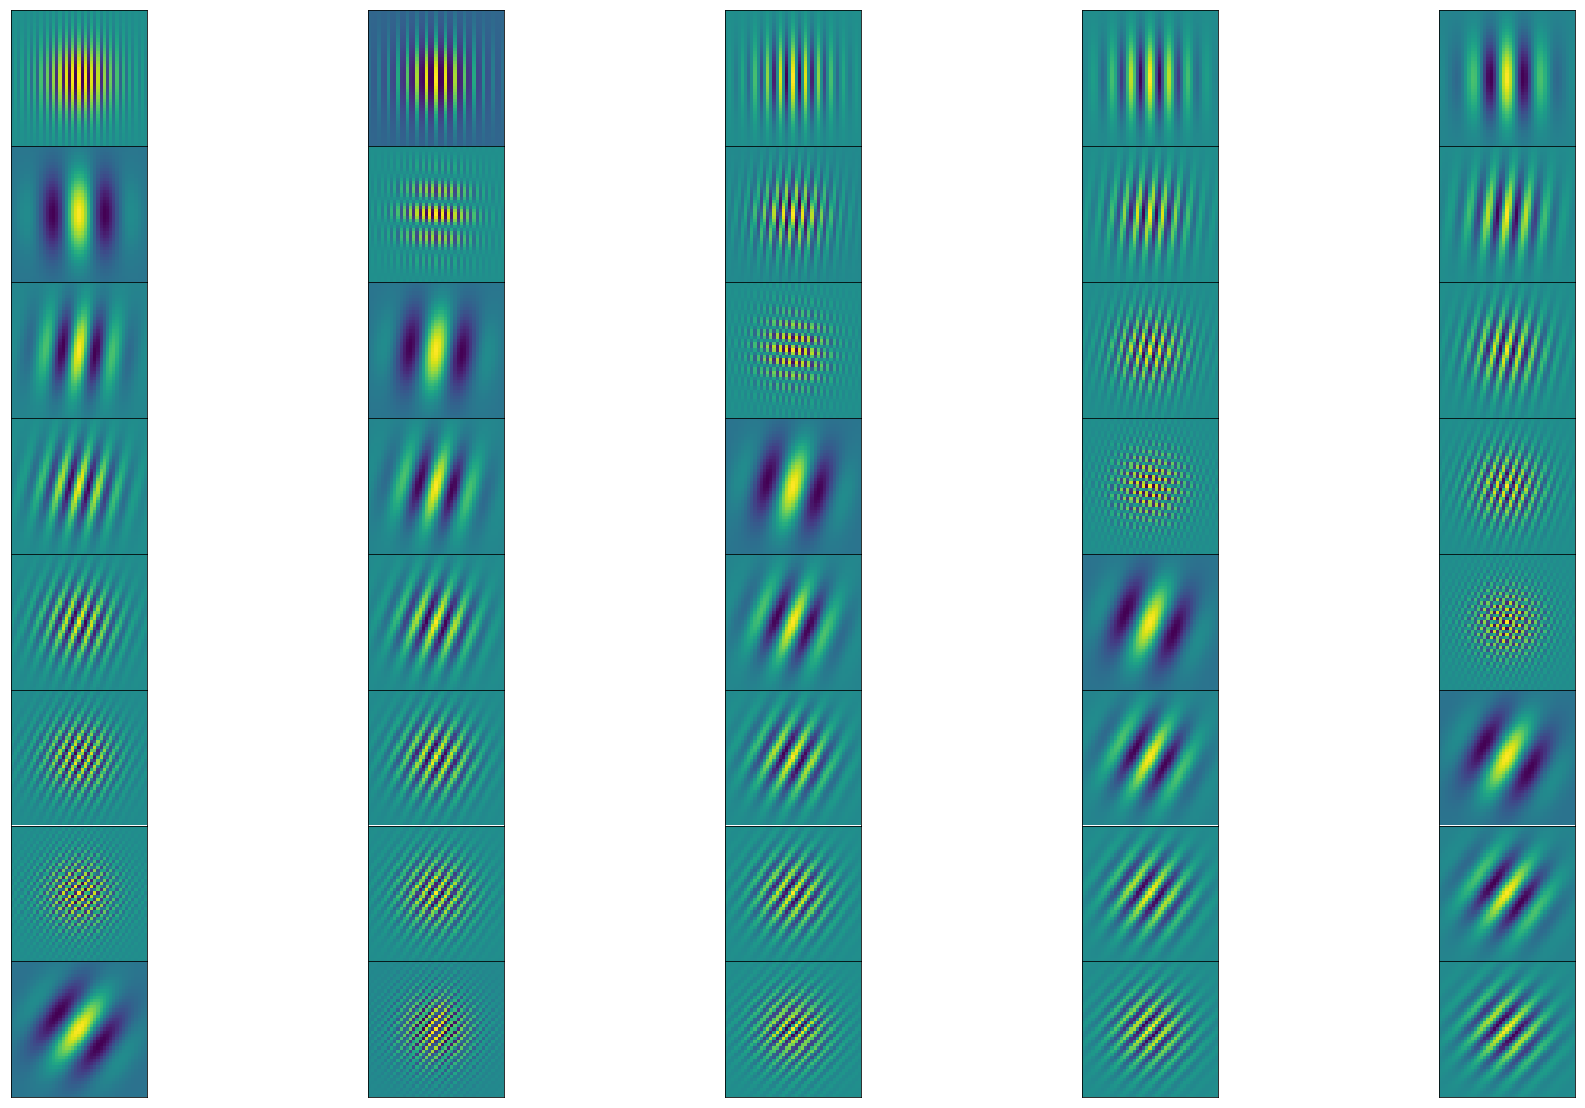

In [34]:
for istep in step_list:
    plot_conv1_kernels2(data[('V6',istep)], istep)

In [30]:
np.array(data['V6',1]['conv1_kernel']).shape

(43, 43, 1, 43)